In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-04-22,2637439
2020-04-23,2722857
2020-04-24,2828682
2020-04-25,2919404
2020-04-26,2993262


<AxesSubplot:title={'center':'Infected People'}, xlabel='date'>

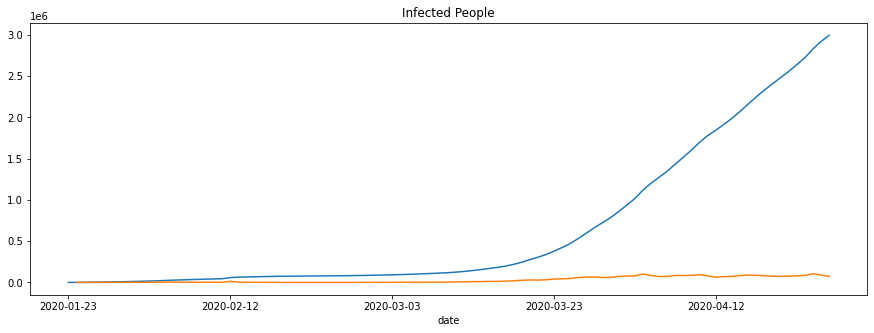

In [5]:
data.infected.plot(figsize=(15, 5), title='Infected People')
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [6]:
from pyramid.arima import auto_arima

ImportError: cannot import name 'six'

In [ ]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

In [ ]:
stepwise_model.aic()

In [ ]:
stepwise_model.fit(data)

In [ ]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [ ]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [ ]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))